In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = r'C:\Users\eduar\Desktop\Projetos\Projeto IPCA\projeto_IPCA\Projeto IPCA\tabela7060_2023_2024.xlsx'

dados = pd.read_excel(url, skiprows=2, nrows=4512)


In [4]:
dados.tail()

,Mês,"Geral, grupo, subgrupo, item e subitem",Rio Branco (AC),São Luís (MA),Aracaju (SE),Campo Grande (MS),Goiânia (GO),Brasília (DF),RM de Belém (PA),RM de Fortaleza (CE),RM de Recife (PE),RM de Salvador (BA),RM de Belo Horizonte (MG),RM da Grande Vitória (ES),RM do Rio de Janeiro (RJ),RM de São Paulo (SP),RM de Curitiba (PR),RM de Porto Alegre (RS)
4507,dezembro 2024,1201048.Cerveja,0,0,0.04,0.62,-0.11,-0.18,-0.47,1.03,0.54,0.1,-1.42,-0.22,0.7,0.53,1.01,0.82
4508,dezembro 2024,1201051.Outras bebidas alcoólicas,-,1.91,-,1.83,-,-,-,-,0.7,-,-,-0.17,-,-,-,-
4509,dezembro 2024,1201052.Vinho,-,-,-,-,-,-,-,-,-,-,-,-,3.87,-,-,-
4510,dezembro 2024,1201061.Doces,-,-,0.51,-,0.83,-,-,-,-,-,-,-,-,-,-,-
4511,dezembro 2024,1201088.Sorvete,0.18,-,1.02,0.95,2.45,-,-,0.5,-,0.5,-,-,-,0.95,1.61,-


# Tratamentos

    - alterar nome das colunas:
        - 'Geral, grupo, subgrupo, item e subitem' para Items
        - Coluna de estados apenas para siglas
        - Meses para apenas meses do ano
    - tratar nomes de dados:
        - coluna de items para apenas os nomes, sem numeros
    - tratar valores:
        - trocar vazios para 0.0
        - mudar para float64
        

In [5]:
# tratando nome de colunas
dados = dados.rename(columns={
       'Geral, grupo, subgrupo, item e subitem': 'Itens', 
       'Rio Branco (AC)' : 'AC',
       'São Luís (MA)':'MA', 
       'Aracaju (SE)':'SE',
       'Campo Grande (MS)':'MS', 
       'Goiânia (GO)':'GO', 
       'Brasília (DF)':'DF',
       'RM de Belém (PA)': 'PA',
       'RM de Fortaleza (CE)' : 'CE',
       'RM de Recife (PE)' : 'PE',
       'RM de Salvador (BA)' : 'BA',
       'RM de Belo Horizonte (MG)' : 'MG',
       'RM da Grande Vitória (ES)' : 'ES',
       'RM do Rio de Janeiro (RJ)' : 'RJ',
       'RM de São Paulo (SP)' : 'SP', 
       'RM de Curitiba (PR)' : 'PR',
       'RM de Porto Alegre (RS)' : 'RS'                
                              })

In [6]:
# tratando coluna de itens
# ^: indica o início da string.
# \d+: corresponde a um ou mais dígitos.
dados['Itens'] = dados['Itens'].str.replace('^\d+\.', '', regex=True)

In [7]:
# tratando valores nulos e alterando tipo para format
col_numericas = list(dados.columns)

dados[col_numericas[2:]] = dados[col_numericas[2:]].apply(lambda x: x.replace('-', '0.0')).astype(np.float64)

In [8]:
# preciso excluir os dados que podem poluir a analise, ex.:Alimentação e bebidas que é a media desse grupo ou Cereais, leguminosas e oleaginosas
dados['Itens'].unique().tolist()

exclusao = [
'Alimentação e bebidas',
'Cereais, leguminosas e oleaginosas',
'Farinhas, féculas e massas',
'Açúcares e derivados',
'Hortaliças e verduras',
'Frutas',
'Carnes',
'Pescados',
'Carnes e peixes industrializados', 
'Aves e ovos',
'Leites e derivados',
'Panificados',
'Óleos e gorduras',
'Bebidas e infusões',
'Enlatados e conservas',
'Sal e condimentos',
'Alimentação fora do domicílio'
]

df = dados.query('Itens not in @exclusao')

In [9]:
# alterar tipo de meses

list(dados['Mês'].unique())

meses_conversao = {
 'janeiro 2023'   : '2023-01'  ,
 'fevereiro 2023' : '2023-02'  ,
 'março 2023'     : '2023-03'  ,
 'abril 2023'     : '2023-04'  ,
 'maio 2023'      : '2023-05'  ,
 'junho 2023'     : '2023-06'  ,
 'julho 2023'     : '2023-07'  ,
 'agosto 2023'    : '2023-08'  ,
 'setembro 2023'  : '2023-09'  ,
 'outubro 2023'   : '2023-10'  ,
 'novembro 2023'  : '2023-11'  ,
 'dezembro 2023'  : '2023-12'  ,
 'janeiro 2024'   : '2024-01' ,
 'fevereiro 2024' : '2024-02' ,
 'março 2024'     : '2024-03' ,
 'abril 2024'     : '2024-04' ,
 'maio 2024'      : '2024-05' ,
 'junho 2024'     : '2024-06' ,
 'julho 2024'     : '2024-07' ,
 'agosto 2024'    : '2024-08' ,
 'setembro 2024'  : '2024-09' ,
 'outubro 2024'   : '2024-10' ,
 'novembro 2024'  : '2024-11' ,
 'dezembro 2024'  : '2024-12'
}

df['Mês'] = df['Mês'].replace(meses_conversao) # 
df['Mês'] = pd.to_datetime(df['Mês'], format='%Y-%m')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4080 entries, 1 to 4511
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Mês     4080 non-null   datetime64[ns]
 1   Itens   4080 non-null   object        
 2   AC      4080 non-null   float64       
 3   MA      4080 non-null   float64       
 4   SE      4080 non-null   float64       
 5   MS      4080 non-null   float64       
 6   GO      4080 non-null   float64       
 7   DF      4080 non-null   float64       
 8   PA      4080 non-null   float64       
 9   CE      4080 non-null   float64       
 10  PE      4080 non-null   float64       
 11  BA      4080 non-null   float64       
 12  MG      4080 non-null   float64       
 13  ES      4080 non-null   float64       
 14  RJ      4080 non-null   float64       
 15  SP      4080 non-null   float64       
 16  PR      4080 non-null   float64       
 17  RS      4080 non-null   float64       
dtypes: datetime64

C:\Users\eduar\AppData\Local\Temp\ipykernel_10492\1882563749.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mês'] = df['Mês'].replace(meses_conversao) #
C:\Users\eduar\AppData\Local\Temp\ipykernel_10492\1882563749.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mês'] = pd.to_datetime(df['Mês'], format='%Y-%m')


# Lista de Itens
 - criar uma lista com itens de uma cesta e avalia-los

In [10]:
categorias = {

    'graos' :           ['Arroz', 'Feijão - carioca (rajado)', 'Farinha de mandioca', 'Farinha de trigo', 'Macarrão'],
    'hortalicas' :      ['Batata-inglesa', 'Tomate', 'Cebola', 'Alface', 'Cenoura', 'Couve', 'Pimentão'],
    'frutas' :          ['Banana - prata', 'Maçã', 'Laranja - pera', 'Mamão', 'Melancia'],
    'proteinas' :       ['Acém', 'Costela', 'Contrafilé', 'Alcatra', 'Carne de porco', 'Frango inteiro', 'Frango em pedaços', 'Ovo de galinha'], 
    'laticinios' :      ['Leite longa vida', 'Queijo', 'Iogurte e bebidas lácteas'],
    'oleos_gorduras' :  ['Manteiga', 'Margarina', 'Óleo de soja', 'Azeite de oliva'],
    'outros' :          ['Café moído', 'Café solúvel', 'Sal']

}

# caso eu queira visualizar o que tem em cada item
# for categoria, itens in categorias.items():
#     print(f'cagoria:{categoria}')
#     for item in itens:
#         print(f' - {item}')

# iteração de cada item (invertendo os valores do dicionario)
item_categoria = {item : categoria for categoria, itens in categorias.items() for item in itens}



In [11]:
# Filtrar apenas SP
ipca_sp = df[['Mês', 'Itens', 'SP']]

# filtrar apenas os itens presentes nas categorias
ipca_sp = ipca_sp[ipca_sp['Itens'].isin(item_categoria)]
ipca_sp = ipca_sp.reset_index(drop=True)


In [12]:
# analise geral 
ipca_sp['Categorias'] = ipca_sp['Itens'].map(item_categoria)

ipca_sp_2024 = ipca_sp[ipca_sp['Mês'].dt.year == 2024].groupby(['Mês','Categorias'])['SP'].sum().reset_index(name = 'Inflacao_mes')

ipca_sp_2024.info()

ipca_sp_2024 = ipca_sp_2024.pivot_table(
    index='Categorias',
    columns=ipca_sp_2024['Mês'].dt.strftime('%Y-%m'),
    values='Inflacao_mes'
)

ipca_sp_2024
# ipca_sp_2024.reset_index(names = ['categorias'],drop=False, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Mês           84 non-null     datetime64[ns]
 1   Categorias    84 non-null     object        
 2   Inflacao_mes  84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ KB


Mês,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Categorias,,,,,,,,,,,,
frutas,9.65,19.72,26.84,27.54,-12.91,-29.85,-23.70,32.93,33.17,-17.66,8.93,9.80
graos,13.44,8.84,1.05,-4.06,-3.99,-2.56,-1.63,-4.85,-2.08,1.80,1.96,1.24
hortalicas,44.13,21.44,31.08,53.52,20.26,11.36,-86.64,-68.62,-27.08,-19.19,26.86,-28.50
laticinios,5.90,4.93,-1.67,2.67,3.03,8.52,-0.35,0.90,3.33,5.32,-1.57,-0.32
oleos_gorduras,6.11,1.99,2.13,1.18,1.55,1.75,-2.25,3.92,3.97,5.86,11.29,6.28
outros,0.60,-1.82,1.33,2.94,2.69,2.46,2.73,2.97,1.03,4.64,3.78,5.49
proteinas,-9.13,5.24,-2.90,-2.04,-1.15,-6.84,-0.71,4.66,19.46,36.72,40.92,38.85


In [13]:
ipca_sp
# ipca_sp.to_csv('tabela_ipca_2024_sp.csv', sep=';')

,Mês,Itens,SP,Categorias
0,2023-01-01,Arroz,2.44,graos
1,2023-01-01,Feijão - carioca (rajado),3.48,graos
2,2023-01-01,Macarrão,0.97,graos
3,2023-01-01,Farinha de trigo,2.93,graos
4,2023-01-01,Farinha de mandioca,2.28,graos
...,...,...,...,...
835,2024-12-01,Azeite de oliva,0.63,oleos_gorduras
836,2024-12-01,Margarina,-0.65,oleos_gorduras
837,2024-12-01,Café moído,5.49,outros
838,2024-12-01,Café solúvel,0.00,outros


In [14]:
# Calculando o IPCA em SP, apenas ano 2024

inflacao_sp = ipca_sp[ipca_sp['Mês'].dt.year == 2024].pivot_table(
    index=['Itens', 'Categorias'],
    columns=ipca_sp['Mês'].dt.strftime('%Y-%m'),
    values='SP'
)

inflacao_sp = inflacao_sp.sort_index(level='Categorias').reset_index()



In [15]:
# Criando uma funcao para calcular a inflação acumulada, através dos meses

def calculo_inflacao(linha):
    calculo = [1 + (linha[mes]/100) for mes in inflacao_sp.iloc[:,2:]]
    return (np.prod(calculo) - 1) * 100

In [16]:
# Criando a coluna inflacao acumulada e ela receberá o calculo realizado

inflacao_sp['inflacao_acumulada'] = inflacao_sp.apply(calculo_inflacao, axis=1).round(2)

In [17]:
# Agora temos uma media simples para determinarmos o valor da inflação pelas categorias

inflacao_categoria = inflacao_sp.groupby('Categorias').mean(numeric_only=True).round(2)

In [18]:
inflacao_sp.to_csv('Inflacao_sp_total.csv',sep=';')
inflacao_categoria.to_csv('Inflacao_categoria.csv', sep=';')

In [19]:
# Colocando a tabela do formato wide para long

pd.melt(
    inflacao_sp,
    id_vars=['Itens', 'Categorias']
)

,Itens,Categorias,Mês,value
0,Banana - prata,frutas,2024-01,4.91
1,Laranja - pera,frutas,2024-01,6.79
2,Mamão,frutas,2024-01,-7.03
3,Maçã,frutas,2024-01,4.98
4,Melancia,frutas,2024-01,0.00
...,...,...,...,...
450,Contrafilé,proteinas,inflacao_acumulada,26.84
451,Costela,proteinas,inflacao_acumulada,23.79
452,Frango em pedaços,proteinas,inflacao_acumulada,6.85
453,Frango inteiro,proteinas,inflacao_acumulada,2.22


In [24]:
set(inflacao_sp['Categorias'].to_list())

{'frutas',
 'graos',
 'hortalicas',
 'laticinios',
 'oleos_gorduras',
 'outros',
 'proteinas'}

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

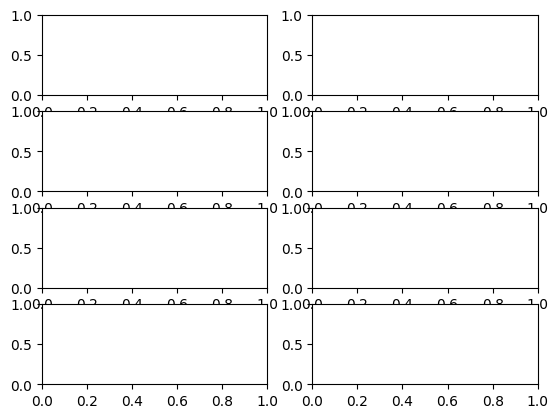

In [31]:
fig, ax = plt.subplots(4,2)

ax[0][0]
ax.plot(inflacao_categoria)